Lattice



The lattice package in R provides a wide range of plot types for data visualization. Some of the common plot types you can create using lattice include:

**Basic plots in Lattice**


In [ ]:
library(lattice)

# Sample data
set.seed(123)
mydata <- data.frame(
  x = rnorm(100),
  y = rnorm(100),
  group = sample(c("A", "B"), 100, replace = TRUE)
)

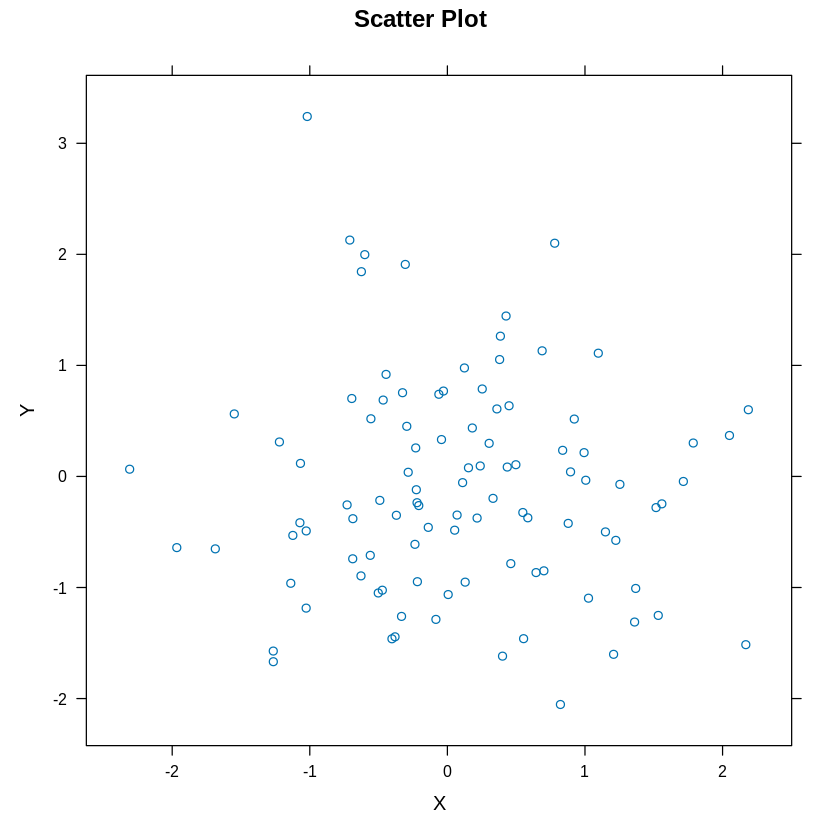

In [ ]:
# Scatter plot
xyplot(y ~ x, data = mydata, main = "Scatter Plot", xlab = "X", ylab = "Y")



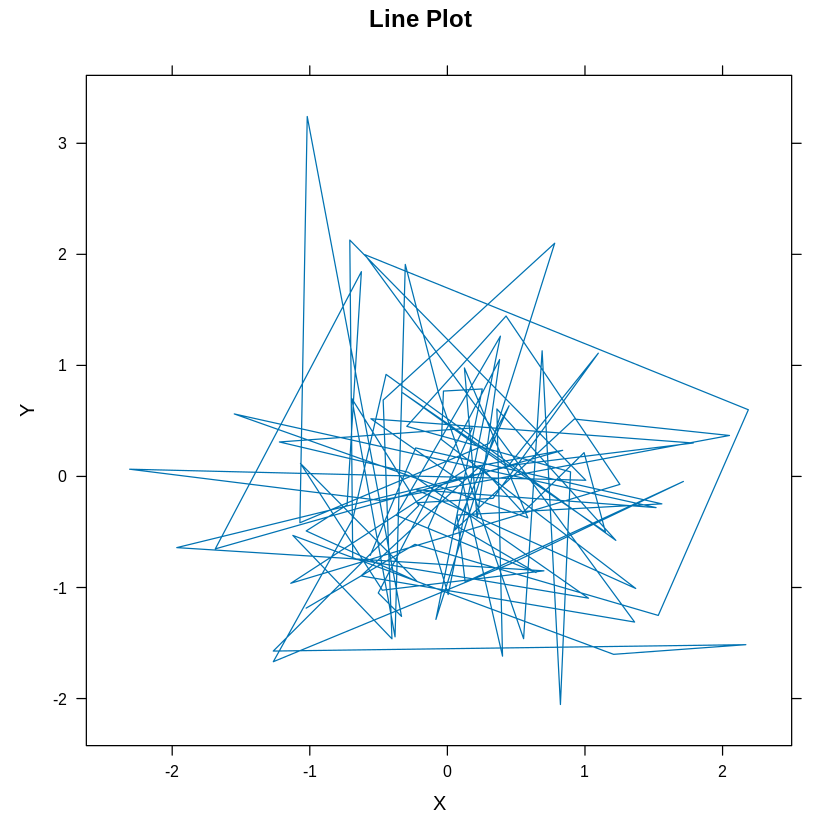

In [ ]:
# Line plot
xyplot(y ~ x, type = "l", data = mydata, main = "Line Plot", xlab = "X", ylab = "Y")



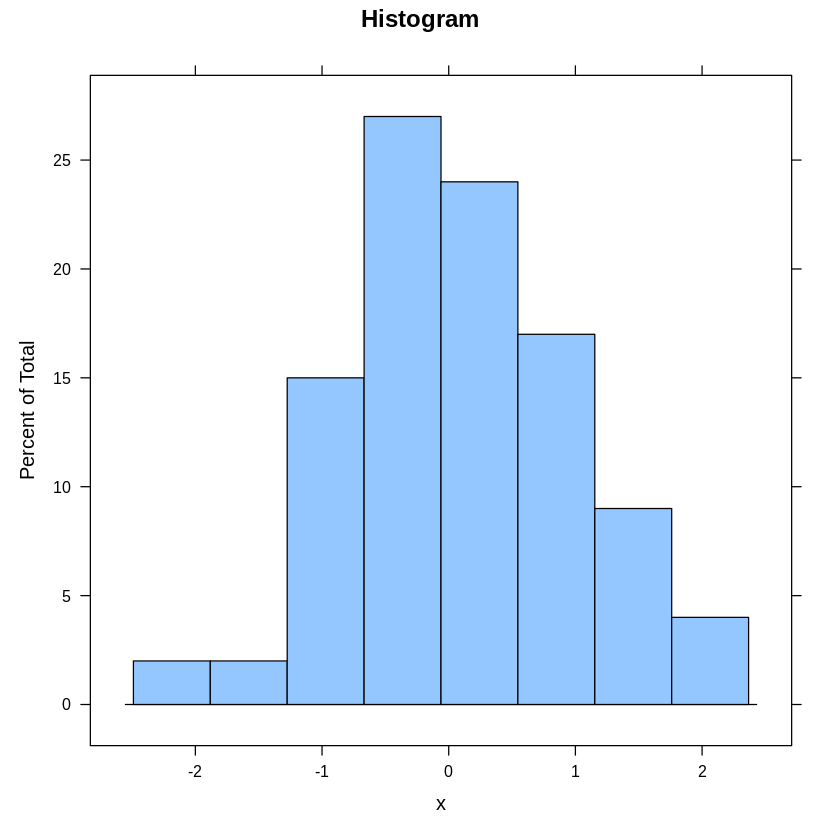

In [ ]:
# Histogram
histogram(~ x, data = mydata, main = "Histogram")



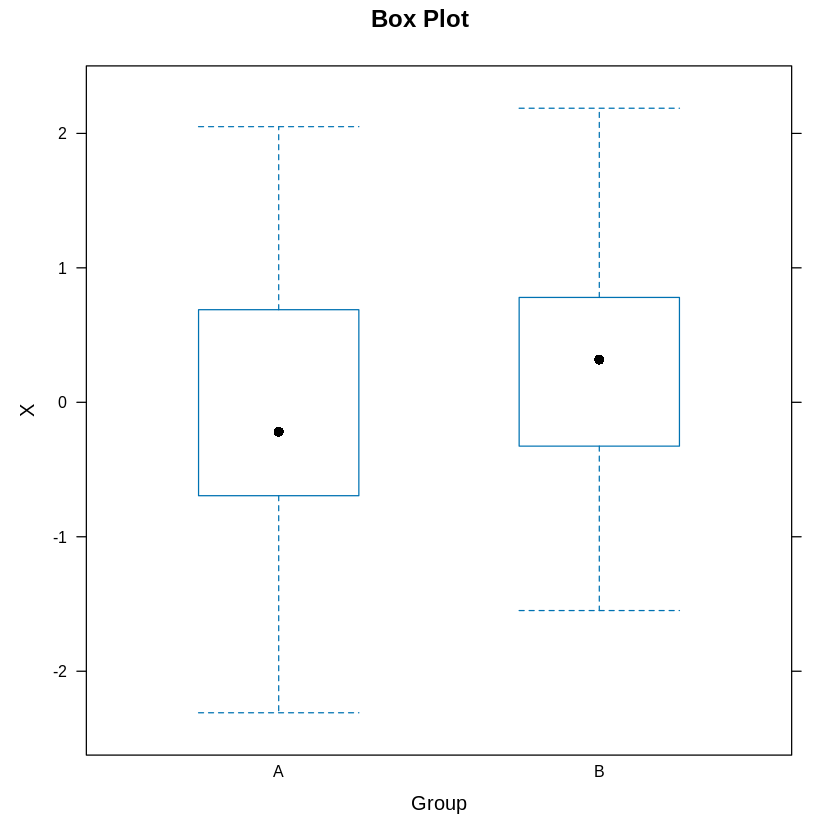

In [ ]:
# Box plot
bwplot(x ~ group, data = mydata, main = "Box Plot", xlab = "Group", ylab = "X")



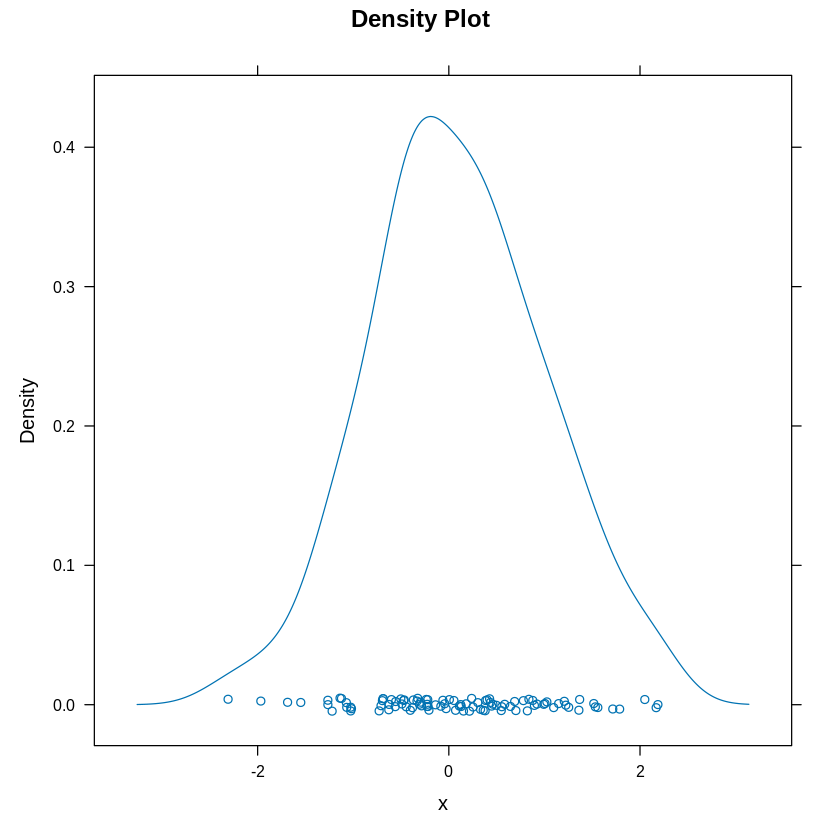

In [ ]:
# Density plot
densityplot(~ x, data = mydata, main = "Density Plot")



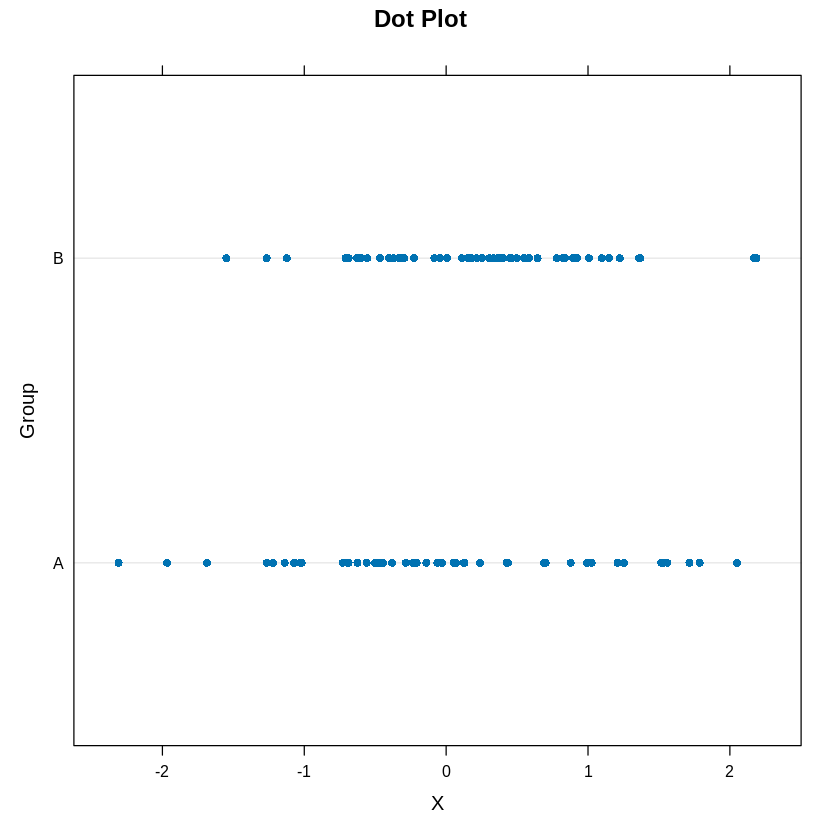

In [ ]:
# Dot plot
dotplot(group ~ x, data = mydata, main = "Dot Plot", xlab = "X", ylab = "Group")


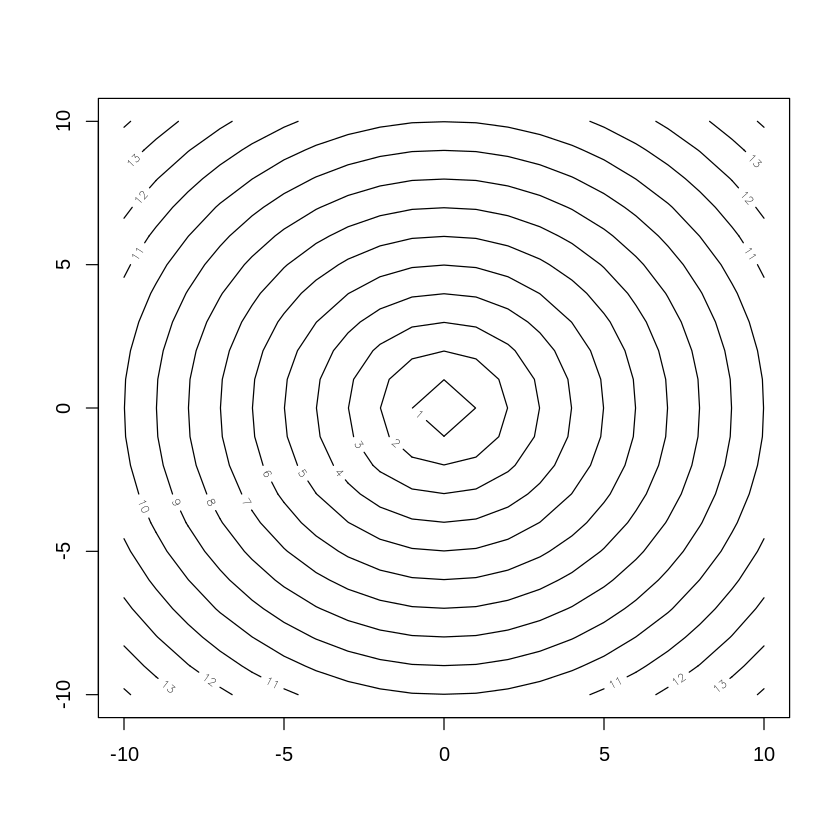

In [ ]:
x <- -10:10
y <- -10:10
z <- sqrt(outer(x ^ 2, y ^ 2, "+"))

contour(x, y, z,
        nlevels = 20)

In [1]:
# Load the dataset into R
house_prices_dataset <- read.csv("/content/sample_data/davfinal.csv")


str(house_prices_dataset)


head(house_prices_dataset)


'data.frame':	271 obs. of  9 variables:
 $ status    : chr  "for_sale" "for_sale" "for_sale" "for_sale" ...
 $ bed       : int  3 4 2 4 4 3 3 2 5 3 ...
 $ bath      : int  2 2 1 2 3 1 2 1 3 2 ...
 $ acre_lot  : num  0.12 0.08 0.15 0.1 0.46 ...
 $ city      : chr  "Adjuntas" "Adjuntas" "Juana Diaz" "Ponce" ...
 $ state     : chr  "Puerto Rico" "Puerto Rico" "Puerto Rico" "Puerto Rico" ...
 $ zip_code  : int  601 601 795 731 612 639 731 730 670 662 ...
 $ house_size: int  920 1527 748 1800 2520 2040 1050 1092 5403 1106 ...
 $ price     : int  105000 80000 67000 145000 179000 50000 71600 100000 300000 89000 ...


,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>
1,for_sale,3,2,0.12,Adjuntas,Puerto Rico,601,920,105000
2,for_sale,4,2,0.08,Adjuntas,Puerto Rico,601,1527,80000
3,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,795,748,67000
4,for_sale,4,2,0.10,Ponce,Puerto Rico,731,1800,145000
5,for_sale,4,3,0.46,San Sebastian,Puerto Rico,612,2520,179000
6,for_sale,3,1,0.20,Ciales,Puerto Rico,639,2040,50000


# **Advance Features**

**Panel** **functions**

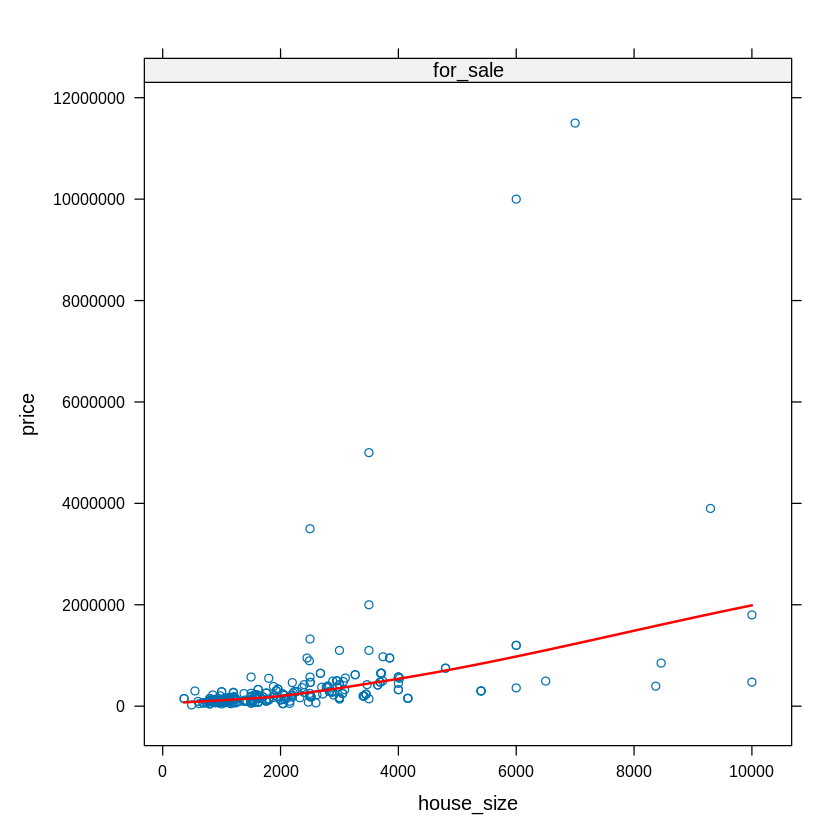

In [ ]:
library(lattice)
# Define a custom panel function
customPanel <- function(x, y, ...) {
  panel.xyplot(x, y, ...)  # Plot the data
  panel.loess(x, y, col = "red", lwd = 2)  # Add a smoother
}

# Use the custom panel function in a lattice plot
xyplot(price ~ house_size | status, data = house_prices_dataset, panel = customPanel)

 In lattice graphics, plots are created by specifying a high-level function (like xyplot() or bwplot()) along with data and conditioning variables. Within these high-level functions, you can specify the appearance and behavior of the panels using panel functions.

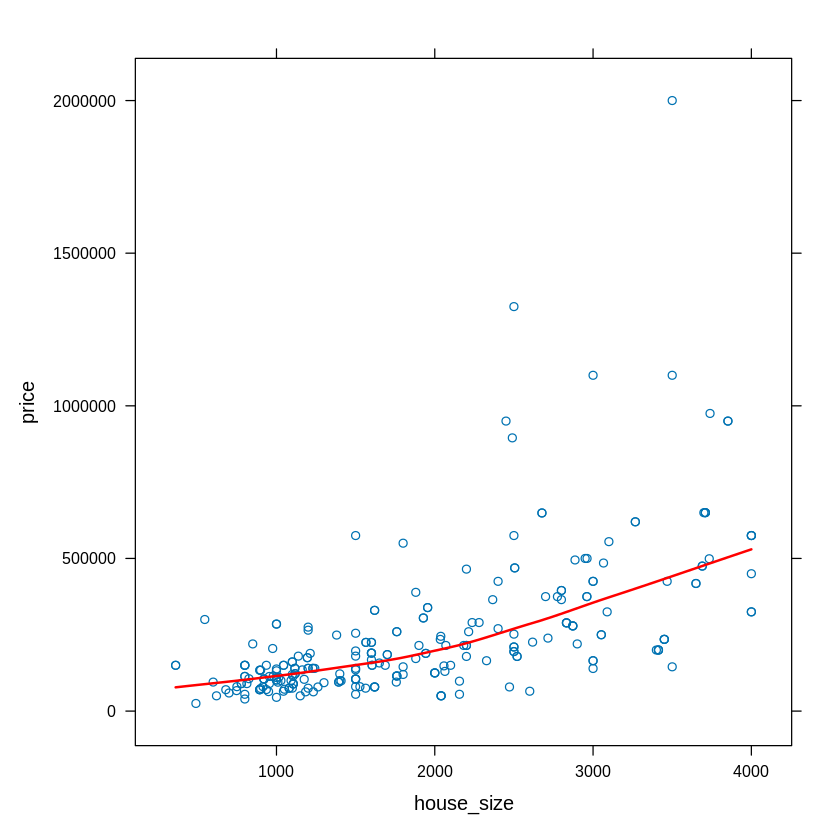

In [ ]:
# Filter the dataset to include only data points within specified ranges
filtered_data <- subset(house_prices_dataset, house_size >= 0 & house_size <= 4000 & price >= 0 & price <= 2000000)

# Use the filtered dataset to create the plot
xyplot(price ~ house_size, data = filtered_data, panel = customPanel)



**Condtioning** **Plotting**

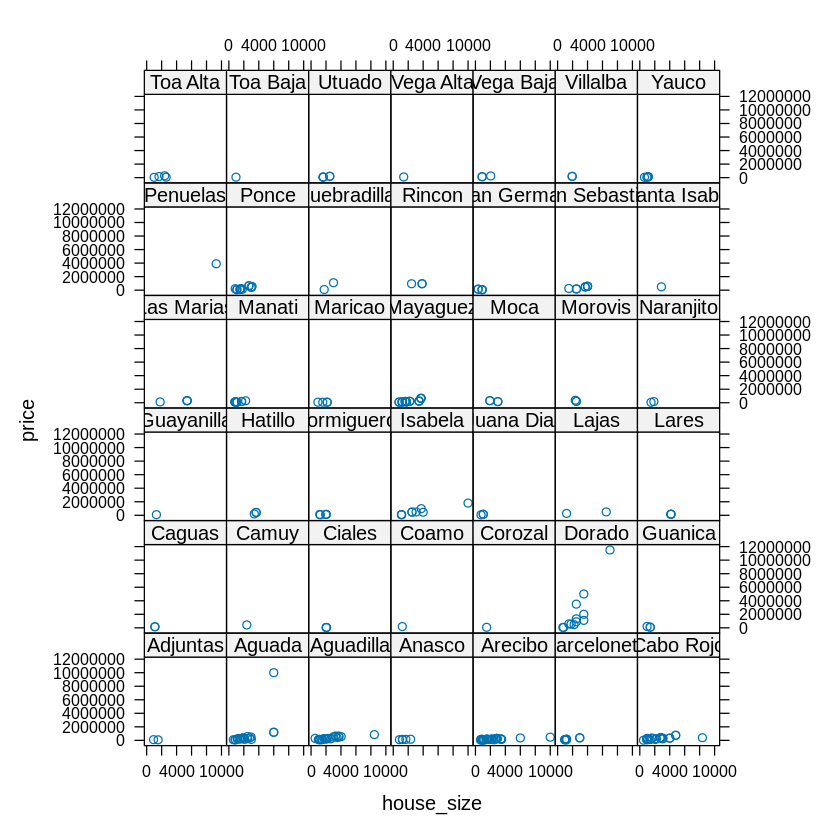

In [ ]:
library(lattice)

# Create a scatterplot conditioned on the city
xyplot(price ~ house_size | city, data = house_prices_dataset)


**Aggregate Functions and Subset selection**

In [ ]:
price_summary_city <- aggregate(price ~ city, data = house_prices_dataset,
                                FUN = function(x) c(mean = mean(x), median = median(x)))

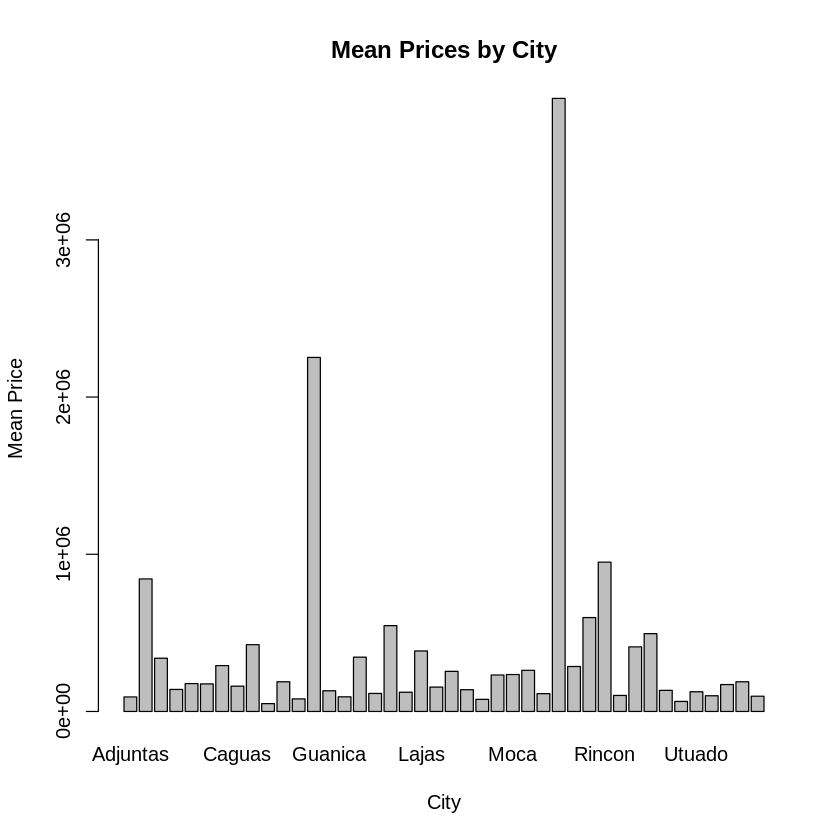

In [ ]:
# Extract mean prices and cities from the price_summary_city data frame
mean_prices <- price_summary_city$price[, "mean"]
cities <- price_summary_city$city

# Create a bar plot of mean prices for each city
barplot(mean_prices, names.arg = cities,
        main = "Mean Prices by City", xlab = "City", ylab = "Mean Price")


In [ ]:
high_priced_houses <- subset(house_prices_dataset, price > 200000)


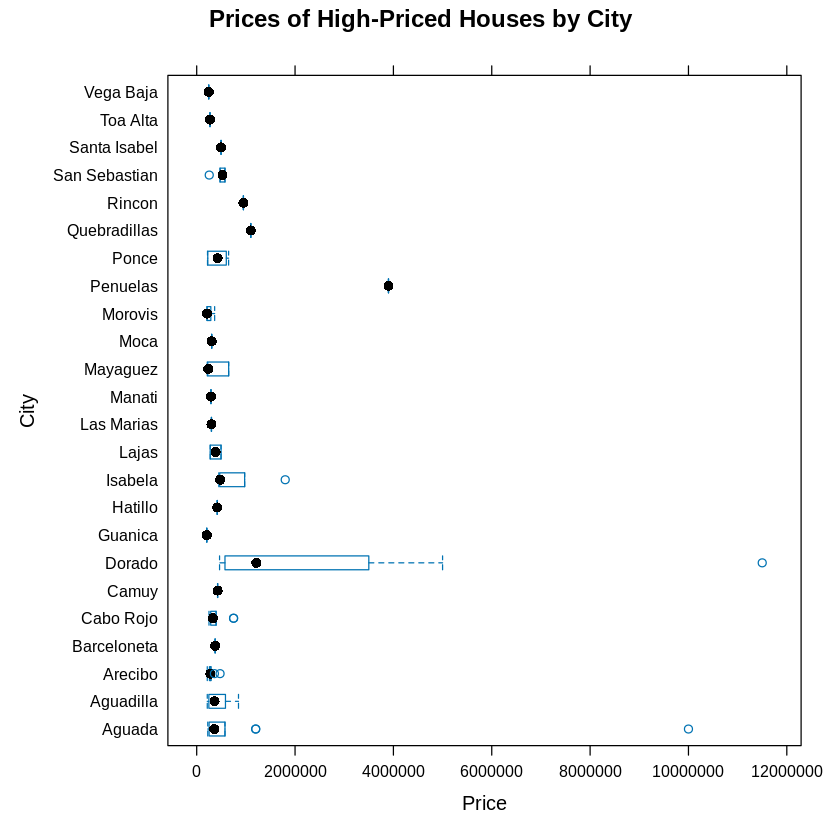

In [ ]:
bwplot(city ~ price, data = high_priced_houses,
       main = "Prices of High-Priced Houses by City",
       xlab = "Price", ylab = "City")

In [ ]:
model_price <- lm(price ~ bed + bath + acre_lot, data = house_prices_dataset)

# Fit multiple regression models with log of price as response variable
model_log_price <- lm(log_price ~ bed + bath + acre_lot, data = house_prices_dataset)

# Compare the summary statistics of the two models
summary(model_price)
summary(model_log_price)

## Data Transformation

In [4]:
house_prices_dataset$log_price <- log(house_prices_dataset$price)

In [5]:
model_price <- lm(price ~ bed + bath + acre_lot, data = house_prices_dataset)

# Fit multiple regression models with log of price as response variable
model_log_price <- lm(log_price ~ bed + bath + acre_lot, data = house_prices_dataset)

# Compare the summary statistics of the two models
summary(model_price)
summary(model_log_price)


Call:
lm(formula = price ~ bed + bath + acre_lot, data = house_prices_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1512624  -269414   -81268   106629 10233779 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -48124     155502  -0.309   0.7572    
bed          -128463      51303  -2.504   0.0129 *  
bath          358775      64525   5.560 6.53e-08 ***
acre_lot       17333      27748   0.625   0.5327    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 964000 on 267 degrees of freedom
Multiple R-squared:  0.1198,	Adjusted R-squared:  0.1099 
F-statistic: 12.12 on 3 and 267 DF,  p-value: 1.846e-07



Call:
lm(formula = log_price ~ bed + bath + acre_lot, data = house_prices_dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6020 -0.4532 -0.1400  0.4365  2.9676 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.33154    0.11942  94.885   <2e-16 ***
bed         -0.08565    0.03940  -2.174   0.0306 *  
bath         0.46566    0.04955   9.397   <2e-16 ***
acre_lot     0.03830    0.02131   1.797   0.0734 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7404 on 267 degrees of freedom
Multiple R-squared:  0.3404,	Adjusted R-squared:  0.333 
F-statistic: 45.94 on 3 and 267 DF,  p-value: < 2.2e-16


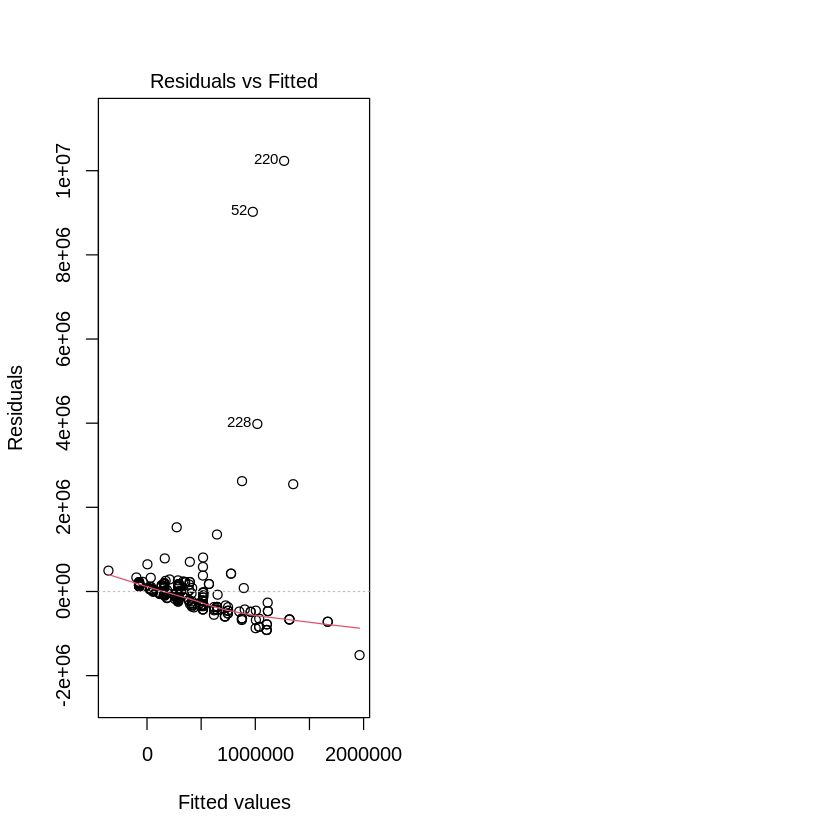

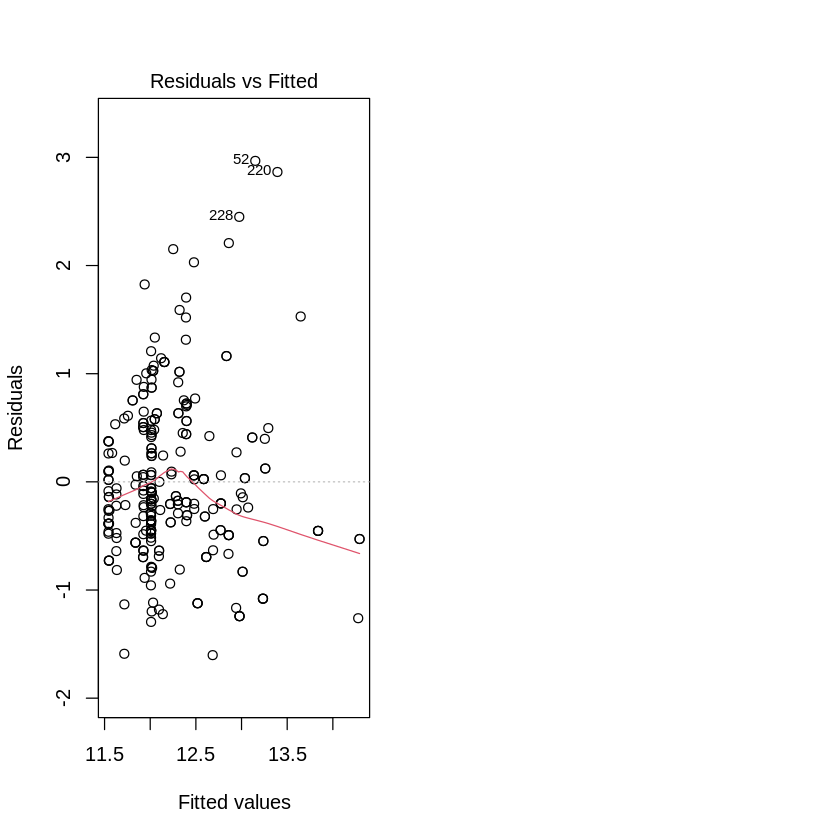

In [6]:
par(mfrow = c(1, 2))  # Set up a 1x2 grid of plots
plot(model_price, which = 1)  # Residuals vs Fitted values


# Create residual plots for the model with log of price as the response variable
par(mfrow = c(1, 2))  # Set up a 1x2 grid of plots
plot(model_log_price, which = 1)  # Residuals vs Fitted values


# Trellis Display

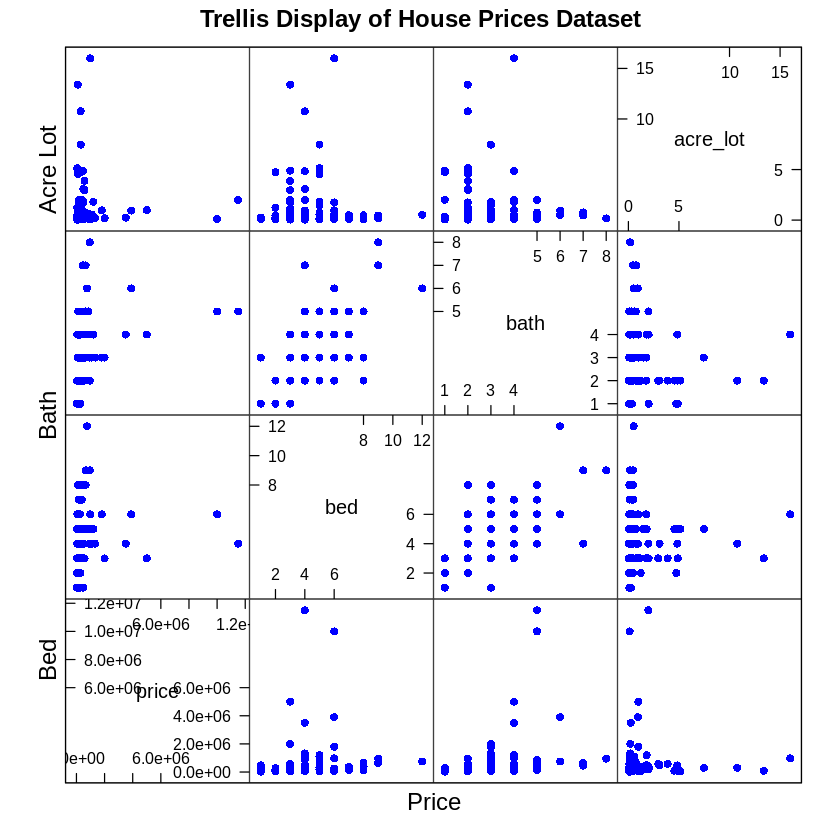

In [ ]:


# Scatterplot matrix using lattice
splom(~ cbind(price, bed, bath, acre_lot), data = house_prices_dataset,
      main = "Trellis Display of House Prices Dataset",
      xlab = list("Price", cex = 1.2), ylab = list(c("Bed", "Bath", "Acre Lot"), cex = 1.2),
      auto.key = list(columns = 2, points = TRUE, lines = FALSE),
      pch = 16, col = "blue")


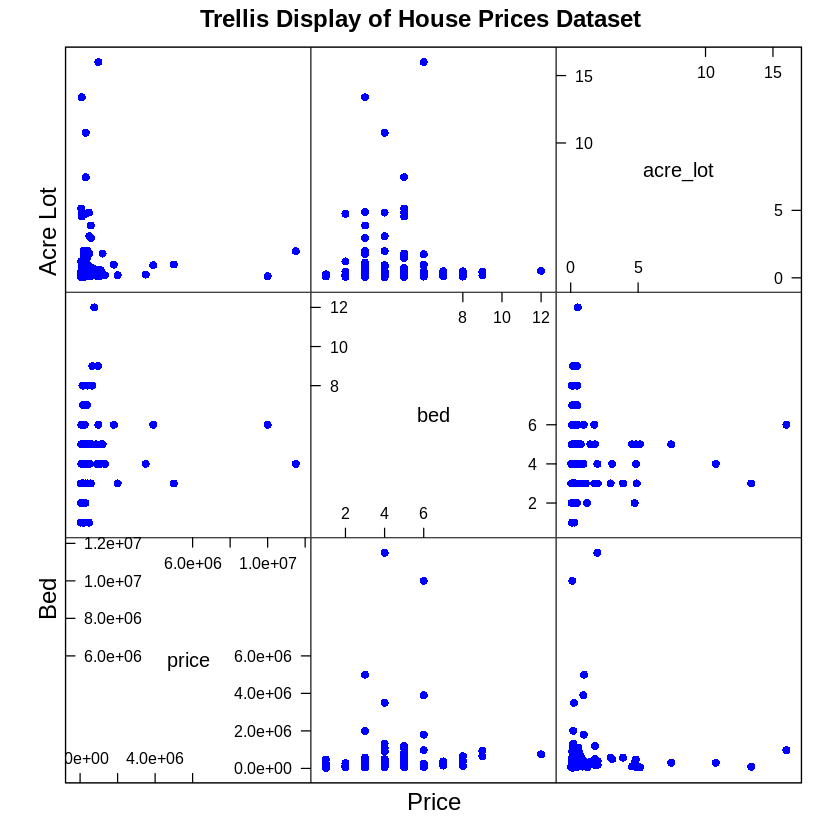

In [ ]:
splom(~ cbind(price, bed, acre_lot), data = house_prices_dataset,
      main = "Trellis Display of House Prices Dataset",
      xlab = list("Price", cex = 1.2),
      ylab = list(c("Bed", "Acre Lot"), cex = 1.2),
      auto.key = list(columns = 2, points = TRUE, lines = FALSE),
      pch = 16, col = "blue")